In [3]:
import pandas as pd
import matplotlib as plt


In [4]:
purchase_behaviour_ds=pd.read_csv("QVI_purchase_behaviour.csv")
purchase_behaviour_ds

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [5]:
transaction_ds=pd.read_excel("QVI_transaction_data.xlsx")
transaction_ds

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


#### EDA for Transaction Dataset


In [6]:
#changing the date column from integer to date.
import datetime
# When dumping to csv excel puts date in 5 digit float format (e.g. 39856.0)
# function converts series of dates to date string.

def date_to_string(digit_date):
    new_form = []
    for d in digit_date:
        try:
            x = datetime.date(1899,12,30) + datetime.timedelta(days=float(d))
            new_form.append(x.strftime('%Y-%m-%d'))
        except:
            new_form.append('n/a')
    return new_form
    
    
# convert dates in a pandas dataframe column to strings
transaction_ds['DATE'] = date_to_string(transaction_ds['DATE'])

# convert to pandas datetime format
# n/a values become NaT
transaction_ds['DATE'] = pd.to_datetime(transaction_ds['DATE'], errors='coerce')


In [7]:
transaction_ds

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [8]:
#Examine the Product
transaction_ds.PROD_NAME.unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

# Lets figure out whether all the items are chips only.
To do so :
Step 1: Remove digits, and special characters, and then sort the distinct
words by frequency of occurrence.

In [9]:
transaction_ds['NEW_PROD_NAME']=transaction_ds['PROD_NAME'] 
transaction_ds['PROD_NAME'] = transaction_ds['PROD_NAME'].str.replace('\d\S*', '',regex=True)
transaction_ds['PROD_NAME'] = transaction_ds['PROD_NAME'].str.replace('&', '', regex=True)

In [10]:
transaction_ds

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,NEW_PROD_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,Natural Chip Compny SeaSalt175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,CCs Nacho Cheese 175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,Smiths Crinkle Cut Chips Chicken 170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/CreamOnion,5,15.0,Smiths Chip Thinly S/Cream&Onion 175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,3,13.8,Kettle Tortilla ChpsHny&Jlpno Chili 150g
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8,Kettle Sweet Chilli And Sour Cream 175g
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4,Tostitos Splash Of Lime 175g
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8,Doritos Mexicana 170g
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8,Doritos Corn Chip Mexican Jalapeno 150g


In [11]:
# look at the most common words by counting the number of times a word
#appears and sorting them by this frequency in order of highest to lowest frequency

In [12]:
full_list = []  # list containing all words of all texts
for elmnt in transaction_ds['PROD_NAME'].apply(lambda n: (n.split(" "))):  # loop over lists in df
    full_list += elmnt  # append elements of lists to full list
    full_list

val_counts = pd.Series(full_list).value_counts()  # make temporary Series to count


In [13]:
print(val_counts)

            791634
Chips        49770
Kettle       41288
Smiths       28860
Salt         27976
             ...  
Sunbites      1432
Pc            1431
NCC           1419
Garden        1419
Fries         1418
Length: 194, dtype: int64


In [14]:
transaction_ds.PROD_NAME.value_counts()

Kettle Mozzarella   Basil  Pesto       3304
Kettle Tortilla ChpsHnyJlpno Chili     3296
Cobs Popd Swt/Chlli Sr/Cream Chips     3269
Tyrrells Crisps     Ched  Chives       3268
Cobs Popd Sea Salt  Chips              3265
                                       ... 
RRD Pc Sea Salt                        1431
Woolworths Medium   Salsa              1430
NCC Sour Cream     Garden Chives       1419
French Fries Potato Chips              1418
WW Crinkle Cut      Original           1410
Name: PROD_NAME, Length: 114, dtype: int64

In [15]:
#Remove salsa products from the dataset as we are only interested in Chips.
transaction_ds['PROD_NAME']=transaction_ds['PROD_NAME'].apply(str.lower) 
indexSalsa = transaction_ds[ (transaction_ds['PROD_NAME'].str.contains('salsa',case=False))].index
transaction_ds.drop(indexSalsa , inplace=True)

In [16]:
transaction_ds.describe

<bound method NDFrame.describe of              DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                  PROD_NAME  PROD_QTY  TOT_SALES  \
0        natural chip        compny seasalt         2        6.0   
1                      ccs nacho chee

In [17]:
transaction_ds.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [18]:
#There are instance where 200 packs of chips has been purchased, lets investigate
# Filter where product quantity is more than 20.
transaction_ds[transaction_ds.PROD_QTY>20]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,NEW_PROD_NAME
69762,2018-08-19,226,226000,226201,4,dorito corn chp supreme,200,650.0,Dorito Corn Chp Supreme 380g
69763,2019-05-20,226,226000,226210,4,dorito corn chp supreme,200,650.0,Dorito Corn Chp Supreme 380g


In [19]:
#There are 2 instances where product quantity is 200 by the same customer.
#Lets see what other transactions the customer has made.
transaction_ds[transaction_ds.LYLTY_CARD_NBR==226000]


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,NEW_PROD_NAME
69762,2018-08-19,226,226000,226201,4,dorito corn chp supreme,200,650.0,Dorito Corn Chp Supreme 380g
69763,2019-05-20,226,226000,226210,4,dorito corn chp supreme,200,650.0,Dorito Corn Chp Supreme 380g


In [20]:
#This customer has made only 2 transactions and looks like its bought for business purpose.
#Remove this outlier.
indexOutlier = transaction_ds[ (transaction_ds['LYLTY_CARD_NBR']==226000)].index
transaction_ds.drop(indexOutlier , inplace=True)

In [21]:
transaction_ds.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [22]:
#Count the number of transactions by date.
transaction_ds.DATE.value_counts()

2018-12-24    865
2018-12-23    853
2018-12-22    840
2018-12-19    839
2018-12-20    808
             ... 
2019-06-24    612
2018-10-18    611
2018-11-25    610
2018-09-22    609
2019-06-13    607
Name: DATE, Length: 364, dtype: int64

In [23]:
#The len
print(pd.to_datetime(pd.Series(["Jul 31, 2009", "Jan 10, 2010", None])))

0   2009-07-31
1   2010-01-10
2          NaT
dtype: datetime64[ns]


In [24]:
df=pd.DataFrame()
df['DATE']=pd.date_range(start="20180701", end="20190630")
df

,DATE
0,2018-07-01
1,2018-07-02
2,2018-07-03
3,2018-07-04
4,2018-07-05
...,...
360,2019-06-26
361,2019-06-27
362,2019-06-28
363,2019-06-29


In [25]:
result = pd.merge(df, transaction_ds, how="left", on=["DATE"])

In [26]:
result

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,NEW_PROD_NAME
0,2018-07-01,47.0,47142.0,42540.0,14.0,smiths crnkle chip orgnl big bag,2.0,11.8,Smiths Crnkle Chip Orgnl Big Bag 380g
1,2018-07-01,55.0,55073.0,48884.0,99.0,pringles sthrn friedchicken,2.0,7.4,Pringles Sthrn FriedChicken 134g
2,2018-07-01,55.0,55073.0,48884.0,91.0,ccs tasty cheese,2.0,4.2,CCs Tasty Cheese 175g
3,2018-07-01,58.0,58351.0,54374.0,102.0,kettle mozzarella basil pesto,2.0,10.8,Kettle Mozzarella Basil & Pesto 175g
4,2018-07-01,68.0,68193.0,65598.0,44.0,thins chips light tangy,2.0,6.6,Thins Chips Light& Tangy 175g
...,...,...,...,...,...,...,...,...,...
246736,2019-06-30,242.0,242159.0,246222.0,36.0,kettle chilli,2.0,10.8,Kettle Chilli 175g
246737,2019-06-30,244.0,244213.0,247339.0,93.0,doritos corn chip southern chicken,2.0,7.8,Doritos Corn Chip Southern Chicken 150g
246738,2019-06-30,256.0,256018.0,255130.0,105.0,woolworths cheese rings,2.0,3.6,Woolworths Cheese Rings 190g
246739,2019-06-30,257.0,257079.0,256218.0,71.0,twisties cheese burger,2.0,8.6,Twisties Cheese Burger 250g


In [27]:
result[ result['PROD_NAME'].isnull()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,NEW_PROD_NAME
120465,2018-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#Therefore 25th dec 2018 there weren't any transaction that happened.


In [29]:
from datetime import date
transaction_ds['month'] = transaction_ds.DATE.dt.month
transaction_ds['day'] = transaction_ds.DATE.dt.day
transaction_ds['year'] = transaction_ds.DATE.dt.year

In [30]:
transaction_ds

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,NEW_PROD_NAME,month,day,year
0,2018-10-17,1,1000,1,5,natural chip compny seasalt,2,6.0,Natural Chip Compny SeaSalt175g,10,17,2018
1,2019-05-14,1,1307,348,66,ccs nacho cheese,3,6.3,CCs Nacho Cheese 175g,5,14,2019
2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken,2,2.9,Smiths Crinkle Cut Chips Chicken 170g,5,20,2019
3,2018-08-17,2,2373,974,69,smiths chip thinly s/creamonion,5,15.0,Smiths Chip Thinly S/Cream&Onion 175g,8,17,2018
4,2018-08-18,2,2426,1038,108,kettle tortilla chpshnyjlpno chili,3,13.8,Kettle Tortilla ChpsHny&Jlpno Chili 150g,8,18,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,kettle sweet chilli and sour cream,2,10.8,Kettle Sweet Chilli And Sour Cream 175g,3,9,2019
264832,2018-08-13,272,272358,270154,74,tostitos splash of lime,1,4.4,Tostitos Splash Of Lime 175g,8,13,2018
264833,2018-11-06,272,272379,270187,51,doritos mexicana,2,8.8,Doritos Mexicana 170g,11,6,2018
264834,2018-12-27,272,272379,270188,42,doritos corn chip mexican jalapeno,2,7.8,Doritos Corn Chip Mexican Jalapeno 150g,12,27,2018


In [31]:
ds=pd.DataFrame()
ds['counting']=transaction_ds.DATE.value_counts(sort = True)
ds['DATE']=ds.counting.index
ds.sort_index()

,counting,DATE
2018-07-01,663,2018-07-01
2018-07-02,650,2018-07-02
2018-07-03,674,2018-07-03
2018-07-04,669,2018-07-04
2018-07-05,660,2018-07-05
...,...,...
2019-06-26,657,2019-06-26
2019-06-27,669,2019-06-27
2019-06-28,673,2019-06-28
2019-06-29,703,2019-06-29


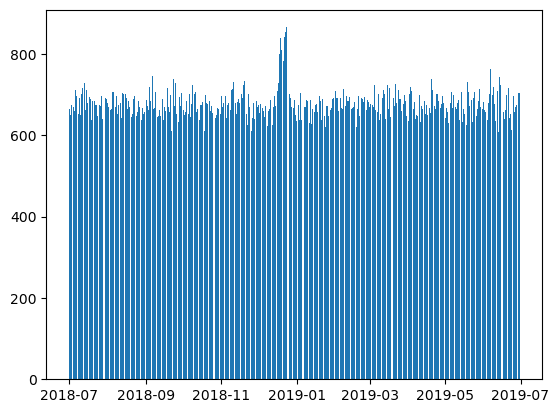

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(ds['DATE'],ds['counting'])
plt.show()

#### We can see that there is an increase in purchases in December and a break in late December.

In [33]:
# Filter to December and look at individual days
rslt_df = transaction_ds[transaction_ds['month'] == 12].reset_index(drop=True)
ds2=pd.DataFrame()
ds2['total']=rslt_df.day.value_counts(sort = False)
ds2['month_day']=ds2.index

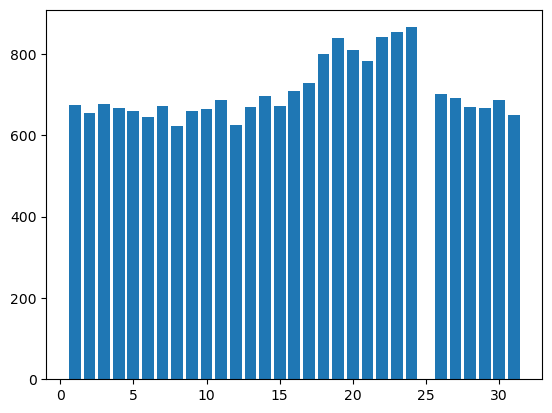

In [34]:
plt.bar(ds2['month_day'],ds2["total"])
plt.show()

#### the increase in sales occurs in the lead-up to Christmas and that
#### there are zero sales on Christmas day itself. This is due to shops being closed on Christmas day.

## lets analyze the chips packet size, by getting the digits from product name.

In [35]:
transaction_ds['SIZE'] = transaction_ds.NEW_PROD_NAME.str.extract('(\d+)')

In [36]:
transaction_ds.SIZE.unique()

array(['175', '170', '150', '330', '210', '270', '220', '125', '110',
       '134', '380', '180', '165', '135', '250', '200', '160', '190',
       '90', '70'], dtype=object)

##### The largest size is 380g and the smallest size is 70g

In [37]:
# Plot a pie chart showing the number of transactions by pack size.
ds4=pd.DataFrame()
ds4['total']=transaction_ds.SIZE.value_counts()
ds4['SIZE']=ds4.total.index
ds4


,total,SIZE
175,66390,175
150,40203,150
134,25102,134
110,22387,110
170,19983,170
165,15297,165
330,12540,330
380,6416,380
270,6285,270
210,6272,210


([<matplotlib.patches.Wedge at 0x7fe2d3194e20>,
 [Text(0.7298541563834111, 0.8229902249783162, '175'),
  Text(-0.6495627515331368, 0.8877320720919688, '150'),
  Text(-1.0936366850880976, 0.11814736996445202, '134'),
  Text(-0.9669003744896726, -0.5245032562451171, '110'),
  Text(-0.560152917486145, -0.9466935665946824, '170'),
  Text(-0.09348680951732384, -1.0960201715508122, '165'),
  Text(0.2927060856561786, -1.0603410524071195, '330'),
  Text(0.5376635762345362, -0.9596446627740339, '380'),
  Text(0.6851612075001152, -0.8605545419884693, '270'),
  Text(0.8134235525405217, -0.74050126547654, '210'),
  Text(0.9068150317092436, -0.622644760891926, '200'),
  Text(0.9636092340136956, -0.530525441542193, '135'),
  Text(1.0037440462735494, -0.44999765507211603, '250'),
  Text(1.035996270284965, -0.36974549078473146, '90'),
  Text(1.0612047302031604, -0.28955918323278496, '190'),
  Text(1.080116100680393, -0.20820472869505924, '160'),
  Text(1.0903295160692408, -0.14553881402641478, '220'),

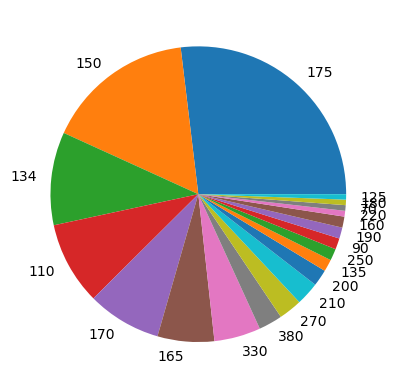

In [38]:
#plt.scatter(ds4['SIZE'],ds4['total'])
plt.pie(ds4['total'], labels = ds4['SIZE'])

# Now to create brands, we can use the first word in PROD_NAME to work out the brandname

In [39]:
transaction_ds['BRAND'] = transaction_ds['PROD_NAME'].str.split(' ').str[0]
transaction_ds.BRAND.unique()

array(['natural', 'ccs', 'smiths', 'kettle', 'grain', 'doritos',
       'twisties', 'ww', 'thins', 'burger', 'ncc', 'cheezels', 'infzns',
       'red', 'pringles', 'dorito', 'infuzions', 'smith', 'grnwves',
       'tyrrells', 'cobs', 'french', 'rrd', 'tostitos', 'cheetos',
       'woolworths', 'snbts', 'sunbites'], dtype=object)

#### Some of the brand names look like they are of the same brands - such as 
#### RED and RRD, which are both Red Rock Deli chips.
#### smiths and smith
#### dorito and doritos
#### ww and woolworths
#### snbts and sunbites
#### ncc and natural chip company
#### infzns and infuzions
#### Grain Waves and grnwves


#### Let's combine these together.

In [40]:
transaction_ds['BRAND'] = transaction_ds['BRAND'].str.replace('RED', 'RRD')
transaction_ds['BRAND'] = transaction_ds['BRAND'].str.replace('smiths', 'smith')
transaction_ds['BRAND'] = transaction_ds['BRAND'].str.replace('dorito', 'doritos')
transaction_ds['BRAND'] = transaction_ds['BRAND'].str.replace('ww', 'woolworths')
transaction_ds['BRAND'] = transaction_ds['BRAND'].str.replace('snbts', 'sunbites')
transaction_ds['BRAND'] = transaction_ds['BRAND'].str.replace('ncc', 'natural')
transaction_ds['BRAND'] = transaction_ds['BRAND'].str.replace('infzns', 'infuzions')
transaction_ds['BRAND'] = transaction_ds['BRAND'].str.replace('Grain Waves', 'grnwves')

transaction_ds.BRAND.unique()

array(['natural', 'ccs', 'smith', 'kettle', 'grain', 'doritoss',
       'twisties', 'woolworths', 'thins', 'burger', 'cheezels',
       'infuzions', 'red', 'pringles', 'doritos', 'grnwves', 'tyrrells',
       'cobs', 'french', 'rrd', 'tostitos', 'cheetos', 'sunbites'],
      dtype=object)

#  Examining customer data

In [41]:
purchase_behaviour_ds.LYLTY_CARD_NBR.value_counts

<bound method IndexOpsMixin.value_counts of 0           1000
1           1002
2           1003
3           1004
4           1005
          ...   
72632    2370651
72633    2370701
72634    2370751
72635    2370961
72636    2373711
Name: LYLTY_CARD_NBR, Length: 72637, dtype: int64>

In [42]:
purchase_behaviour_ds.LIFESTAGE.unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [43]:
purchase_behaviour_ds.LIFESTAGE.value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

([<matplotlib.patches.Wedge at 0x7fe2e8c02200>,
 [Text(0.8820918503599302, 0.657201618629013, 'RETIREES'),
  Text(-0.3685995579118257, 1.0364045377685331, 'OLDER SINGLES/COUPLES'),
  Text(-1.099589081641277, -0.030064123724020408, 'YOUNG SINGLES/COUPLES'),
  Text(-0.5233956450661755, -0.967500386938301, 'OLDER FAMILIES'),
  Text(0.350254459336784, -1.0427472434462233, 'YOUNG FAMILIES'),
  Text(0.9462172838224409, -0.560957085520526, 'MIDAGE SINGLES/COUPLES'),
  Text(1.0933220057309005, -0.12102475690767187, 'NEW FAMILIES')])

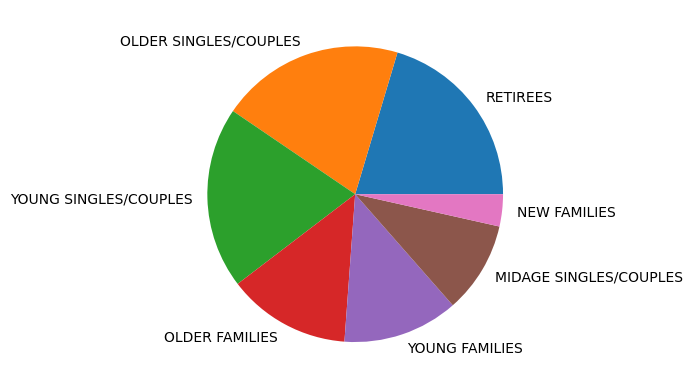

In [44]:
plt.pie(purchase_behaviour_ds.LIFESTAGE.value_counts(),labels=purchase_behaviour_ds.LIFESTAGE.value_counts().index)

In [45]:
purchase_behaviour_ds.PREMIUM_CUSTOMER.value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

([<matplotlib.patches.Wedge at 0x7fe2ea14e7d0>,
 [Text(0.33130129505993366, 1.048922996168742, 'Mainstream'),
  Text(-0.9921718718009669, -0.47496839558750203, 'Budget'),
  Text(0.751739180577092, -0.8030493162846739, 'Premium')])

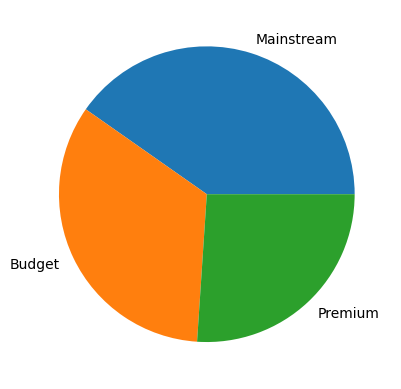

In [46]:
plt.pie(purchase_behaviour_ds.PREMIUM_CUSTOMER.value_counts(),labels=purchase_behaviour_ds.PREMIUM_CUSTOMER.value_counts().index)

#### Lets merge transaction and consumers data.


In [47]:
complete_df = pd.merge(transaction_ds, purchase_behaviour_ds, how='inner', on = 'LYLTY_CARD_NBR')
complete_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,NEW_PROD_NAME,month,day,year,SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,natural chip compny seasalt,2,6.0,Natural Chip Compny SeaSalt175g,10,17,2018,175,natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,ccs nacho cheese,3,6.3,CCs Nacho Cheese 175g,5,14,2019,175,ccs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,ww original stacked chips,2,3.8,WW Original Stacked Chips 160g,11,10,2018,160,woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,ccs original,1,2.1,CCs Original 175g,3,9,2019,175,ccs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken,2,2.9,Smiths Crinkle Cut Chips Chicken 170g,5,20,2019,170,smith,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,kettle sweet chilli and sour cream,2,10.8,Kettle Sweet Chilli And Sour Cream 175g,3,9,2019,175,kettle,YOUNG SINGLES/COUPLES,Premium
246736,2018-08-13,272,272358,270154,74,tostitos splash of lime,1,4.4,Tostitos Splash Of Lime 175g,8,13,2018,175,tostitos,YOUNG SINGLES/COUPLES,Premium
246737,2018-11-06,272,272379,270187,51,doritos mexicana,2,8.8,Doritos Mexicana 170g,11,6,2018,170,doritoss,YOUNG SINGLES/COUPLES,Premium
246738,2018-12-27,272,272379,270188,42,doritos corn chip mexican jalapeno,2,7.8,Doritos Corn Chip Mexican Jalapeno 150g,12,27,2018,150,doritoss,YOUNG SINGLES/COUPLES,Premium


In [48]:
#lets check for null values to See if any transactions did not have a matched customer.
complete_df.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
NEW_PROD_NAME       0
month               0
day                 0
year                0
SIZE                0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

#### there are no nulls! So all our customers in the transaction data has been accounted for in the customer dataset.

In [49]:
#Save this dataframe for task 2
from pathlib import Path  
filepath = Path('/Users/ektapatnaik/Documents/Personal/Data Analytics/Quantium Virtual Internship/complete_transaction.csv')  
complete_df.to_csv(filepath) 

## Data analysis on customer segments 

start with calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER and
plotting the split by these segments to describe which customer segment contribute
most to chip sales.

In [54]:
grouped_data=pd.DataFrame()
grouped_data=complete_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size()
filepath = Path('/Users/ektapatnaik/Documents/Personal/Data Analytics/Quantium Virtual Internship/grouped_data.csv')  
grouped_data.to_csv(filepath) 

In [61]:
new_grouped_data=pd.read_csv('grouped_data.csv')
new_grouped_data

,LIFESTAGE,PREMIUM_CUSTOMER,0
0,MIDAGE SINGLES/COUPLES,Budget,4691
1,MIDAGE SINGLES/COUPLES,Mainstream,11095
2,MIDAGE SINGLES/COUPLES,Premium,7612
3,NEW FAMILIES,Budget,2824
4,NEW FAMILIES,Mainstream,2185
5,NEW FAMILIES,Premium,1488
6,OLDER FAMILIES,Budget,21514
7,OLDER FAMILIES,Mainstream,13241
8,OLDER FAMILIES,Premium,10403
9,OLDER SINGLES/COUPLES,Budget,17172


In [78]:
df1=new_grouped_data.pivot(index='LIFESTAGE',columns='PREMIUM_CUSTOMER')
df1

0                   
PREMIUM_CUSTOMER       Budget Mainstream Premium
LIFESTAGE                                       
MIDAGE SINGLES/COUPLES   4691      11095    7612
NEW FAMILIES             2824       2185    1488
OLDER FAMILIES          21514      13241   10403
OLDER SINGLES/COUPLES   17172      17061   16560
RETIREES                14225      19970   12236
YOUNG FAMILIES          17763      11947   10784
YOUNG SINGLES/COUPLES    8573      19544    5852

In [100]:
df1.index

Index(['MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'OLDER SINGLES/COUPLES', 'RETIREES', 'YOUNG FAMILIES',
       'YOUNG SINGLES/COUPLES'],
      dtype='object', name='LIFESTAGE')

In [81]:
df1.columns

MultiIndex([('0',     'Budget'),
            ('0', 'Mainstream'),
            ('0',    'Premium')],
           names=[None, 'PREMIUM_CUSTOMER'])

<Figure size 2000x600 with 0 Axes>

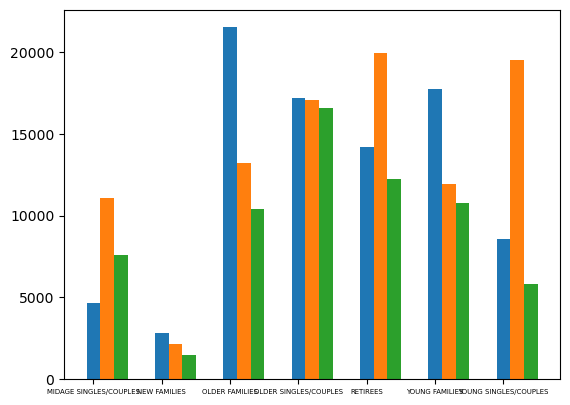

<Figure size 2000x600 with 0 Axes>

In [110]:
import numpy as np
budget=df1['0']['Budget']
mainstream=df1['0']['Mainstream']
premium=df1['0']['Premium']
x=np.arange(len(budget))
x2=x
w=0.2
plt.bar(x,df1['0']['Budget'],width=.2)
x=x+w
plt.bar(x,df1['0']['Mainstream'],width=.2)
x=x+w
plt.bar(x,df1['0']['Premium'],width=.2)
plt.xticks(x2,df1.index)
plt.tick_params(axis='x', labelsize=5)
plt.figure(figsize=(20,6))

Sales are coming mainly from Budget - older families, Mainstream - young
singles/couples, and Mainstream - retirees

##Let's see if the higher sales are due to there being more customers who buy chips.

In [111]:
purchase_behaviour_ds.groupby('LIFESTAGE')['PREMIUM_CUSTOMER'].count()

LIFESTAGE
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
OLDER FAMILIES             9780
OLDER SINGLES/COUPLES     14609
RETIREES                  14805
YOUNG FAMILIES             9178
YOUNG SINGLES/COUPLES     14441
Name: PREMIUM_CUSTOMER, dtype: int64

In [116]:
grouped_data_2=purchase_behaviour_ds.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size()
grouped_data_2

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget              1504
                        Mainstream          3340
                        Premium             2431
NEW FAMILIES            Budget              1112
                        Mainstream           849
                        Premium              588
OLDER FAMILIES          Budget              4675
                        Mainstream          2831
                        Premium             2274
OLDER SINGLES/COUPLES   Budget              4929
                        Mainstream          4930
                        Premium             4750
RETIREES                Budget              4454
                        Mainstream          6479
                        Premium             3872
YOUNG FAMILIES          Budget              4017
                        Mainstream          2728
                        Premium             2433
YOUNG SINGLES/COUPLES   Budget              3779
                        Main

In [122]:
filepath = Path('/Users/ektapatnaik/Documents/Personal/Data Analytics/Quantium Virtual Internship/grouped_data_2.csv')  
grouped_data_2.to_csv(filepath) 
df2=pd.read_csv('grouped_data_2.csv')
df3=df2.pivot(index='LIFESTAGE',columns='PREMIUM_CUSTOMER')
df3

0                   
PREMIUM_CUSTOMER       Budget Mainstream Premium
LIFESTAGE                                       
MIDAGE SINGLES/COUPLES   1504       3340    2431
NEW FAMILIES             1112        849     588
OLDER FAMILIES           4675       2831    2274
OLDER SINGLES/COUPLES    4929       4930    4750
RETIREES                 4454       6479    3872
YOUNG FAMILIES           4017       2728    2433
YOUNG SINGLES/COUPLES    3779       8088    2574

<Figure size 2000x600 with 0 Axes>

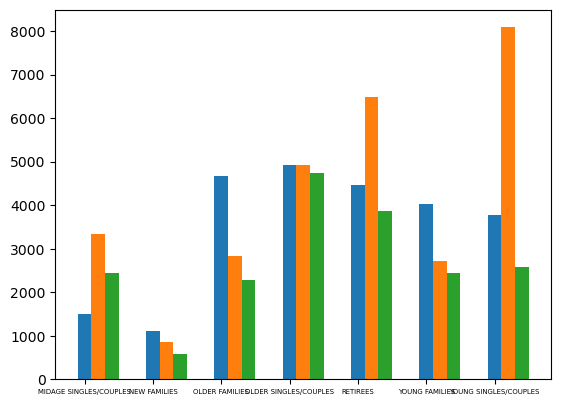

<Figure size 2000x600 with 0 Axes>

In [123]:
budget=df3['0']['Budget']
mainstream=df3['0']['Mainstream']
premium=df3['0']['Premium']
x=np.arange(len(budget))
x2=x
w=0.2
plt.bar(x,df3['0']['Budget'],width=.2)
x=x+w
plt.bar(x,df3['0']['Mainstream'],width=.2)
x=x+w
plt.bar(x,df3['0']['Premium'],width=.2)
plt.xticks(x2,df3.index)
plt.tick_params(axis='x', labelsize=5)
plt.figure(figsize=(20,6))

There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. 
This contributes to there being more sales to these customer segments but
this is not a major driver for the Budget - Older families segment.

#### Higher sales may also be driven by more units of chips being bought per customer. 


In [125]:
#### Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER

